In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [10]:
# Load the data (assuming each sheet has the same format)
yolopose_df = pd.read_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\EXCEL\checkdataset_yolopose.xlsx")
mediapipe_df = pd.read_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\EXCEL\checkdataset_mediapipe.xlsx")
movenet_df = pd.read_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\EXCEL\checkdataset_movenet.xlsx")
keypoint_rcnn_df = pd.read_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\EXCEL\checkdataset_keypoint_rcnn.xlsx")
#hybrid_df=pd.read_excel(r"c:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\GROK\checkdataset_keypoint_coordinates_.xlsx")
# Assuming ground truth is in all sheets, extract one of them
groundtruth_df = pd.read_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\EXCEL\checkdataset_gt.xlsx") 
 # Example: Extract from yolopose.xlsx


In [11]:
keypoints = ["left_shoulder", "left_elbow", "left_wrist", "left_hip", "left_knee", "left_ankle"]


In [12]:
# Function to compute Mean Absolute Error (MAE)
def compute_mae(pred_df, gt_df, keypoints):
    errors = {}
    for keypoint in keypoints:
        x_pred, y_pred = pred_df[f"{keypoint}_x"], pred_df[f"{keypoint}_y"]
        x_gt, y_gt = gt_df[f"{keypoint}_x"], gt_df[f"{keypoint}_y"]

        # Compute MAE: Mean Absolute Error (MAE) for x and y coordinates separately
        mae_x = np.mean(np.abs(x_pred - x_gt))
        mae_y = np.mean(np.abs(y_pred - y_gt))

        # Store the average of MAE in X and Y direction
        errors[keypoint] = (mae_x + mae_y) / 2

    return errors


In [13]:
yolopose_mae = compute_mae(yolopose_df, groundtruth_df, keypoints)
mediapipe_mae = compute_mae(mediapipe_df, groundtruth_df, keypoints)
movenet_mae = compute_mae(movenet_df, groundtruth_df, keypoints)
keypoint_rcnn_mae = compute_mae(keypoint_rcnn_df, groundtruth_df, keypoints)
#hybrid_mae = compute_mae(hybrid_df, groundtruth_df, keypoints)

In [18]:
# Create a DataFrame to store MAE results
mae_df = pd.DataFrame({
    "Keypoint": keypoints,
    #"YOLOPose": [yolopose_mae[k] for k in keypoints],
    "MediaPipe": [mediapipe_mae[k] for k in keypoints],
    #"Movenet": [movenet_mae[k] for k in keypoints],
    "Keypoint R-CNN": [keypoint_rcnn_mae[k] for k in keypoints],
    "Hybrid": [hybrid_mae[k] for k in keypoints]
})

print(mae_df)


        Keypoint  MediaPipe  Keypoint R-CNN    Hybrid
0  left_shoulder   0.006574        0.003676  0.003686
1     left_elbow   0.004694        0.004707  0.003047
2     left_wrist   0.004839        0.003614  0.003614
3       left_hip   0.012373        0.008054  0.008054
4      left_knee   0.005828        0.005885  0.005947
5     left_ankle   0.007151        0.003562  0.003562


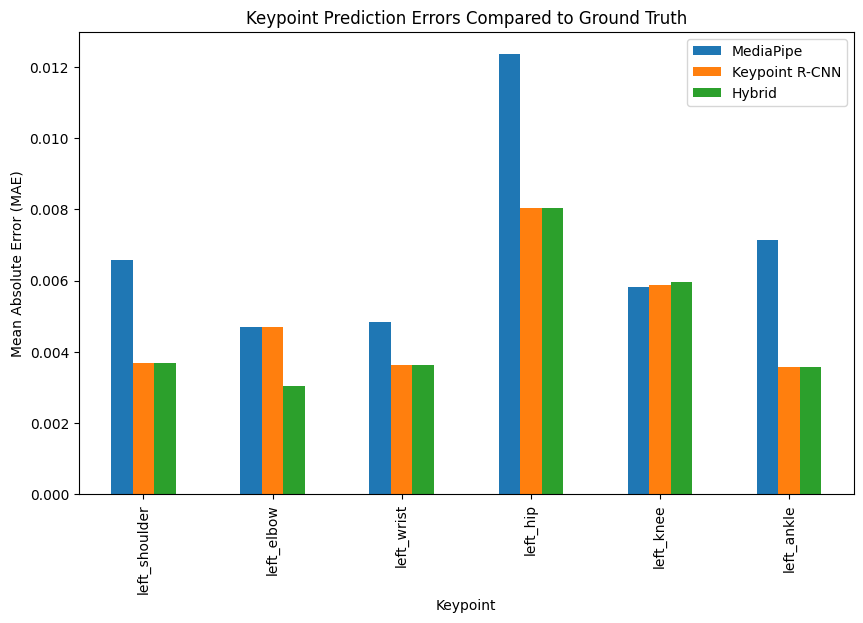

In [19]:
# Plot MAE comparison
mae_df.set_index("Keypoint").plot(kind="bar", figsize=(10, 6))
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Keypoint Prediction Errors Compared to Ground Truth")
plt.show()


In [16]:
# Compute overall MAE across all keypoints
overall_mae = {
    "YOLOPose": np.mean(list(yolopose_mae.values())),
    "MediaPipe": np.mean(list(mediapipe_mae.values())),
    "Movenet": np.mean(list(movenet_mae.values())),
    "Keypoint R-CNN": np.mean(list(keypoint_rcnn_mae.values())),
    #"Hybrid": np.mean(list(hybrid_mae.values()))
}

print("Overall MAE:", overall_mae)


Overall MAE: {'YOLOPose': 0.008985900000000002, 'MediaPipe': 0.0069097, 'Movenet': 0.010502933333333337, 'Keypoint R-CNN': 0.004916233333333335}


In [17]:
# Convert errors to percentage
overall_mae_percentage = {key: value * 100 for key, value in overall_mae.items()}

print("Overall MAE in percentage:", overall_mae_percentage)


Overall MAE in percentage: {'YOLOPose': 0.8985900000000001, 'MediaPipe': 0.6909700000000001, 'Movenet': 1.0502933333333337, 'Keypoint R-CNN': 0.49162333333333347}
